## Data Analysis

In [128]:
# to handle datasets
import pandas
import pandas as pd
import numpy as np

# to plot
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# display all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [129]:
# Load dataset
data = pd.read_csv(filepath_or_buffer='train.csv')

# Show rows and columns of the data
print(data.shape)

(1460, 81)


In [130]:
# Visualize the dataset.
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [131]:
# We don't need the ID so we can drop it.
data.drop(labels='Id', axis=1, inplace=True)

data.shape

(1460, 80)

# 2.1 Analysis

*We will analyze the following:*

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    * Discrete
    * Continuous
    * Distributions
    * Transformations
5. Categorical variables
    * Cardinality
    * Rare Labels -- unusual labels
    * Special mappings

The target is `SalesPrice`.

## 2.2 Target
Lets begin by exploring the target distribution.

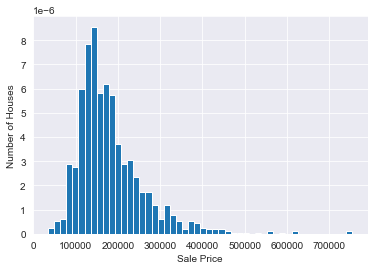

In [132]:
# Histogram to evaluate target distribution.

data['SalePrice'].hist(bins=50, density=True)

# Define the x and y axes
plt.ylabel('Number of Houses')
plt.xlabel('Sale Price')

# Visualize the histogram
plt.show()

We can see that the target is continuous. It is similar to a gaussian curve, or normal distribution.
However, it is scewed a little to the right, we can transform that to make it look more gaussian.

We can transform the value spread with a mathematical transformation.

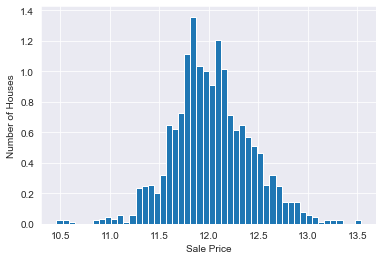

In [133]:
# Let's transform the target using a logarithm

np.log(data['SalePrice']).hist(bins=50, density=True)
plt.ylabel('Number of Houses')
plt.xlabel('Sale Price')

plt.show()

 We see that, after the mathematical transformation, we see that the target now has a more gaussian looking distribution.
 In general, normal distribution helps improve the performance of the model.

## 2.3 Variable Types
Next, let's identify the categorical and numerical variables.

In [134]:
# All the variables.
print(data.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Let's first identify the categorical variables. Usually, the variables of type *object* are categorical variables in pandas; they are usually strings.

In [135]:
categorical_variables = [var for var in data.columns if data[var].dtype == 'O']
print(categorical_variables)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


The dataset taken from Kaggle has a `data_description.txt` that describes `MSSubClass` as categorical despite it having a number to represent. `MSSubClass` represents dwelling type,
so let's include it to our list.

In [136]:
categorical_variables.append('MSSubClass')
len(categorical_variables)

44

In [137]:
# Cast all the categorical variables as categorical
data[categorical_variables] = data[categorical_variables].astype('O')

Now let's identify all the numerical variables. Numerical variables cannot be the same as categorical variables, and they can't be the target either.

In [138]:
numerical_variables = [var for var in data.columns if var not in categorical_variables and var != 'SalePrice']
print(numerical_variables)
len(numerical_variables)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


35

## 3 Missing values
Let's go ahead and find out which variables of the dataset contains missing values.

In [139]:
# Make a list of variables that have missing values.
missing_value_variables = [var for var in data.columns if data[var].isnull().sum() > 0]
print(missing_value_variables)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Determine percentage of missing values (expressed as decimals), and display the results ordered by % missing data.

In [140]:
data[missing_value_variables].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Our dataset contains a few variables with a big proportion of missing values (4 variables at the top). And some other variables with a small percentage of missing observations. This means that to train a machine learning model with this dataset, we need to input the missing data in these variables. We can also visualize the percentage of missing values in the variables as follows:

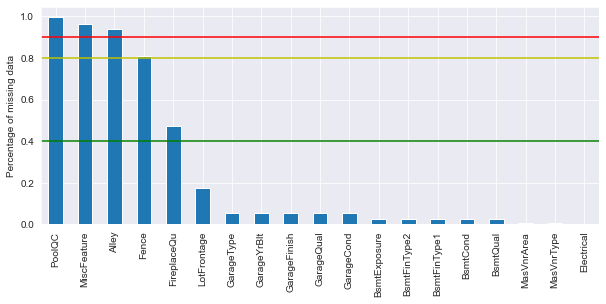

In [141]:
# plot

data[missing_value_variables].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,4))

plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='y', linestyle='-')
plt.axhline(y=0.40, color='g', linestyle='-')

plt.show()

Now we can determine which variables, from those with missing data, are numerical and which are categorical.

In [142]:
categorical_missing = [var for var in categorical_variables if var in missing_value_variables]
numerical_missing = [var for var in numerical_variables if var in missing_value_variables]

print('Number of categorical variables with missing values: ', len(categorical_missing))
print(categorical_missing)

Number of categorical variables with missing values:  16
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [143]:
print('Number of numerical variables with missing values: ', len(numerical_missing))
print(numerical_missing)

Number of numerical variables with missing values:  3
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


## 3.1 Relationship between missing data and Sale Price
Let's evaluate the price of the house in those observations where the information is missing. We will do this for each variable that shows missing data.

In [144]:
def analyze_missing_value(df, var) -> None:
    """
    See if filling out missing values has any affect on the median price.
    """
    # Copy of the dataframe, so that we do not override the original data
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # Let's compare the median SalePrice in the observations where data is
    # missing vs. the observations where data is available.

    # Determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])
    tmp.plot(kind="barh", y="mean", legend=False, xerr="std",
             title="Sale Price", color="green")
    plt.show()

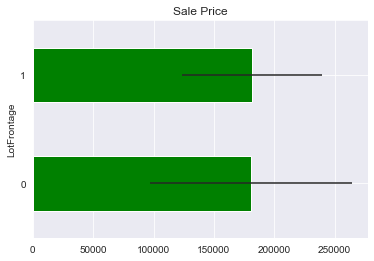

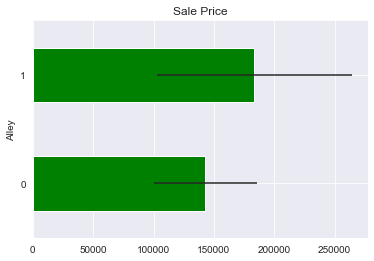

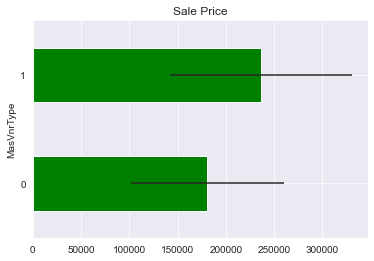

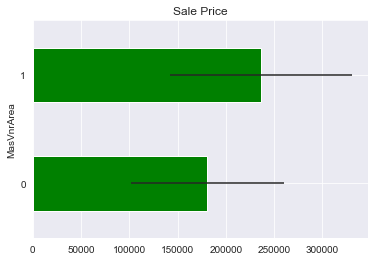

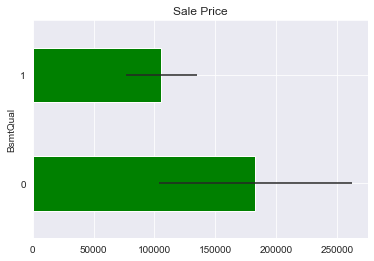

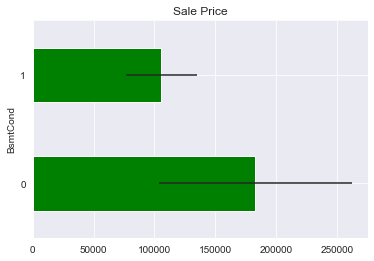

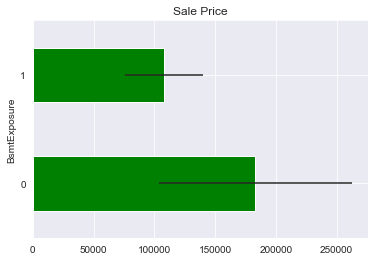

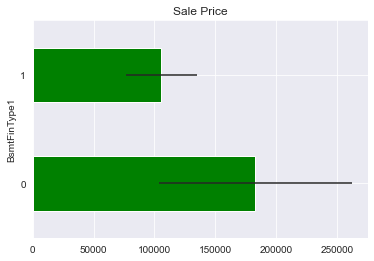

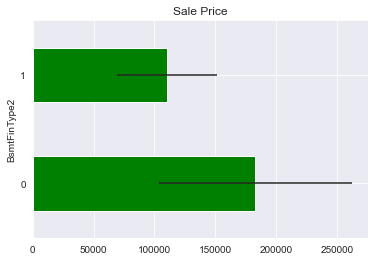

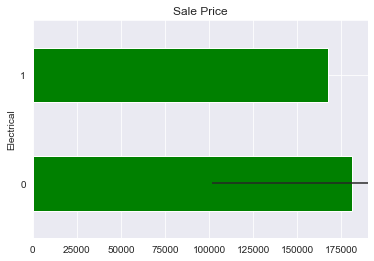

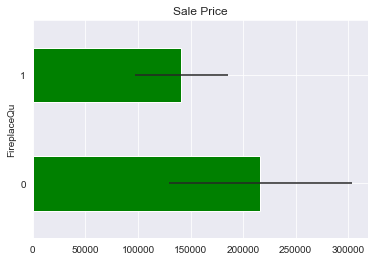

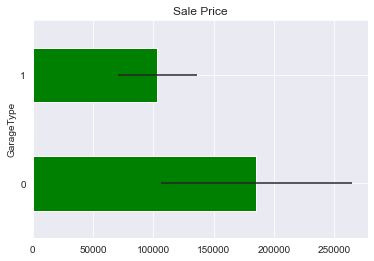

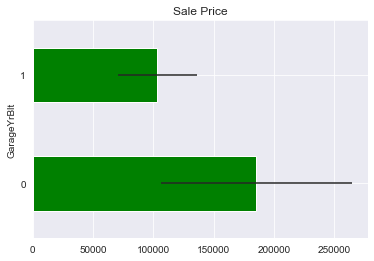

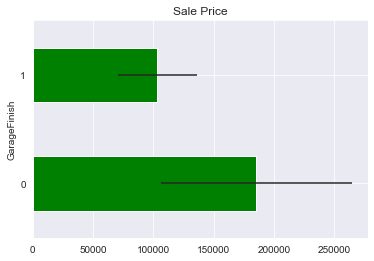

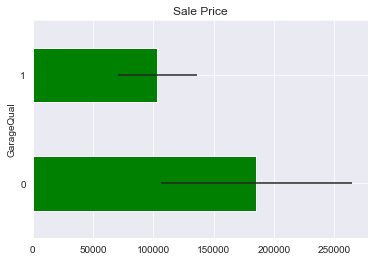

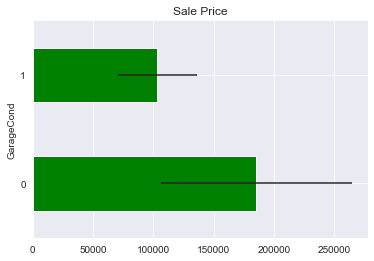

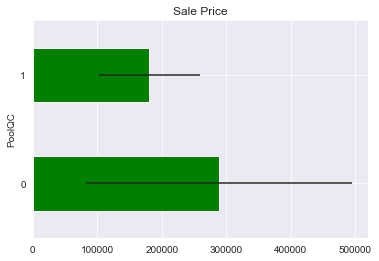

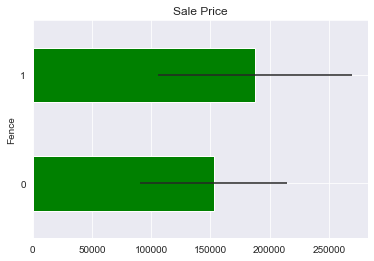

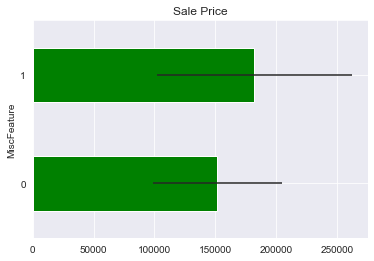

In [145]:
for var in missing_value_variables:
    analyze_missing_value(data, var)